# **Credit Card Users Churn Prediction**

----------------------
# **Problem Statement**
----------------------

The Thera bank recently saw a steep decline in the number of credit card users. Credit cards are a good source of money for banks because of several types of fees charged by the banks, such as annual fees, balance transfer costs, cash advance fees, late payment fees, international transaction fees, and others. Some costs are assessed to all users regardless of consumption, while others are assessed only under specific conditions.

Customers leaving credit card services would result in a loss for the bank, so the bank wants to analyse customer data to identify customers who will leave their credit card services and the reasons for doing so – so that the bank can improve in those areas.

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards. **You need to identify the best possible model that will give the required performance**.

------------------------------------
## **Dataset Description**
------------------------------------
* **CLIENTNUM** - Client number. Unique identifier for the customer holding the account 
* **Attrition_Flag** - Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* **Customer_Age** - Age in Years
* **Gender** - Gender of the account holder
* **Dependent_count** - Number of dependents 
* **Education_Level** - Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* **Marital_Status** - Marital Status of the account holder
* **Income_Category** - Annual Income Category of the account holder
* **Card_Category** - Type of Card
* **Months_on_book** - Period of relationship with the bank (in months)
* **Total_Relationship_Count** - Total no. of products held by the customer
* **Months_Inactive_12_mon** - No. of months inactive in the last 12 months
* **Contacts_Count_12_mon** - No. of Contacts in the last 12 months
* **Credit_Limit** - Credit Limit on the Credit Card
* **Total_Revolving_Bal** - Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy** - Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1** - Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt** - Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct** - Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1** - Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio** - Average Card Utilization Ratio

#### **What is a Revolving Balance?**

* If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance.


#### **What is the Average Open to buy?**

* 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

#### **What is the Average utilization Ratio?**

* The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


**Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:**

* ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

-------------------------------------------------------------------

## Importing Libraries

In [2]:
#libraries to help read visualize and manipulate data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to supress warnings
import warnings
warnings.filterwarnings("ignore")

#### Load Data

In [3]:
import os
path = r"C:\Users\jarre\OneDrive\Desktop\Data_Science\GL_DataScience\Supervised_Learning\Classification\Practice_Problems"

In [4]:
os.chdir(path)

In [5]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
type(df.loc[1,"Total_Ct_Chng_Q4_Q1"])

numpy.float64

In [7]:
#show all columns
pd.set_option("display.max_columns",None)

#show 100 rows of data
pd.set_option("display.max_rows",100)

# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)


In [8]:
df.shape

(10127, 21)

- We have 10127 observations
- We have 21 Columns

Data Overview

In [9]:
#create a copy of the data
data = df.copy(deep=True)

In [10]:
#check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

We have object columns to convert to categorical 
- Attrition_Flag
- Dependent_count
- Education_Level
- Marital_Status
- Income_Category
- Card_Category

We have some missing values

### Check for missing values

In [11]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [12]:
data.isnull().sum()/data.isnull().count()

CLIENTNUM                  0.00000
Attrition_Flag             0.00000
Customer_Age               0.00000
Gender                     0.00000
Dependent_count            0.00000
Education_Level            0.15000
Marital_Status             0.07396
Income_Category            0.00000
Card_Category              0.00000
Months_on_book             0.00000
Total_Relationship_Count   0.00000
Months_Inactive_12_mon     0.00000
Contacts_Count_12_mon      0.00000
Credit_Limit               0.00000
Total_Revolving_Bal        0.00000
Avg_Open_To_Buy            0.00000
Total_Amt_Chng_Q4_Q1       0.00000
Total_Trans_Amt            0.00000
Total_Trans_Ct             0.00000
Total_Ct_Chng_Q4_Q1        0.00000
Avg_Utilization_Ratio      0.00000
dtype: float64

In [13]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.00000
Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            15.00000
Marital_Status              7.40000
Income_Category             0.00000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
dtype: float64

- 15% of education level values are missing
- 7.4% of marital status values are missing

In [14]:
data.count()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level              8608
Marital_Status               9378
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

### Check statistical summary of columns

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


- Customer Age is from 26-73
- Average customer been with bank 3 years and max 5 years and min 1 year
- Customers use an average of almost 4 products
- Average contact in 12 months is 2.45
- Mean cc limit exceeds median cc limit right skew maybe some outliers
- Average open to buy mean double the median right skew maybe some outliers

#### Univariate analysis for categorical variables

In [16]:
data.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


- 1/3 customers make less than $40k
- Nearly 1/3 customers have graduate education
- 83% customer retention rate

In [17]:
8500/10127

0.8393403772094401

Wnat are the unique values in each categorical column

In [18]:
category_columns = data.describe(include='object').columns
#category_columns.drop(index='CLIENTNUM')

category_columns = category_columns.to_list()
#category_columns.remove('CLIENTNUM')
print(category_columns)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [19]:

title = {}
for columnname in category_columns:
    cat = {}
    for item,value in data[columnname].items():
        if value not in cat:
            cat[value] = 1
        else:
            cat[value] += 1
    
    if columnname not in title:
        title[columnname] = cat

print(title)


{'Attrition_Flag': {'Existing Customer': 8500, 'Attrited Customer': 1627}, 'Gender': {'M': 4769, 'F': 5358}, 'Education_Level': {'High School': 2013, 'Graduate': 3128, 'Uneducated': 1487, nan: 1519, 'College': 1013, 'Post-Graduate': 516, 'Doctorate': 451}, 'Marital_Status': {'Married': 4687, 'Single': 3943, nan: 749, 'Divorced': 748}, 'Income_Category': {'$60K - $80K': 1402, 'Less than $40K': 3561, '$80K - $120K': 1535, '$40K - $60K': 1790, '$120K +': 727, 'abc': 1112}, 'Card_Category': {'Blue': 9436, 'Gold': 116, 'Silver': 555, 'Platinum': 20}}


- What does abc mean in the income category
- Majority blue cards in card category

### Data Preprocessing

In [20]:
#drop client id column
data.drop(columns='CLIENTNUM',inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


Look at Distribution

In [21]:
dist_columns = data.describe().columns
dist_columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

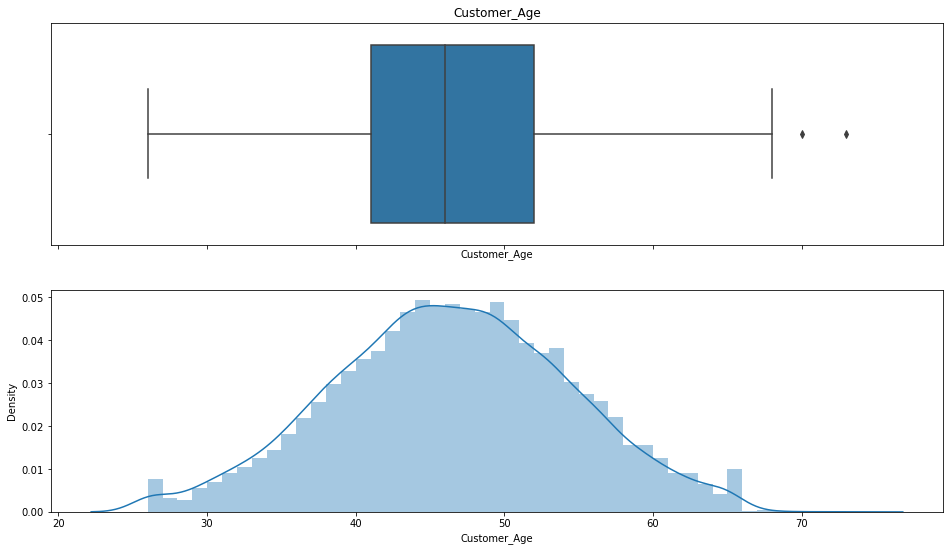

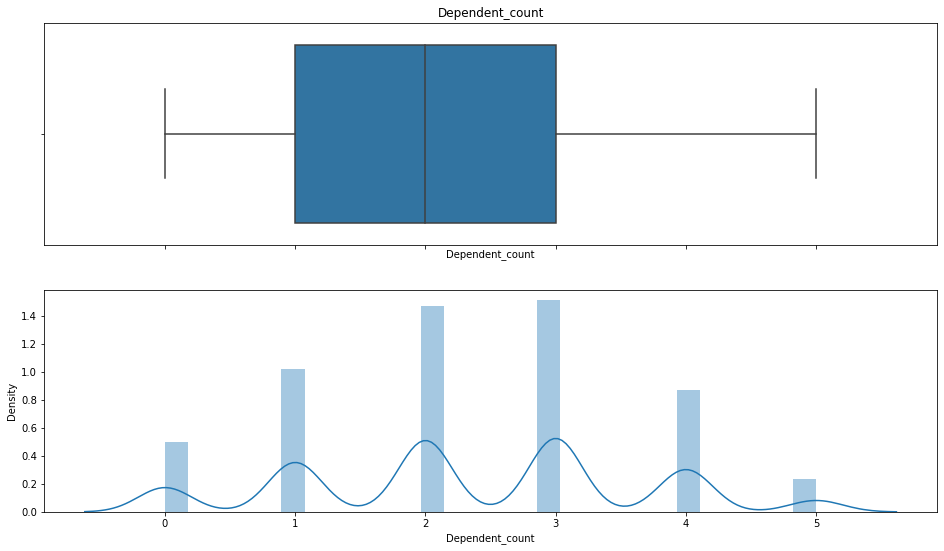

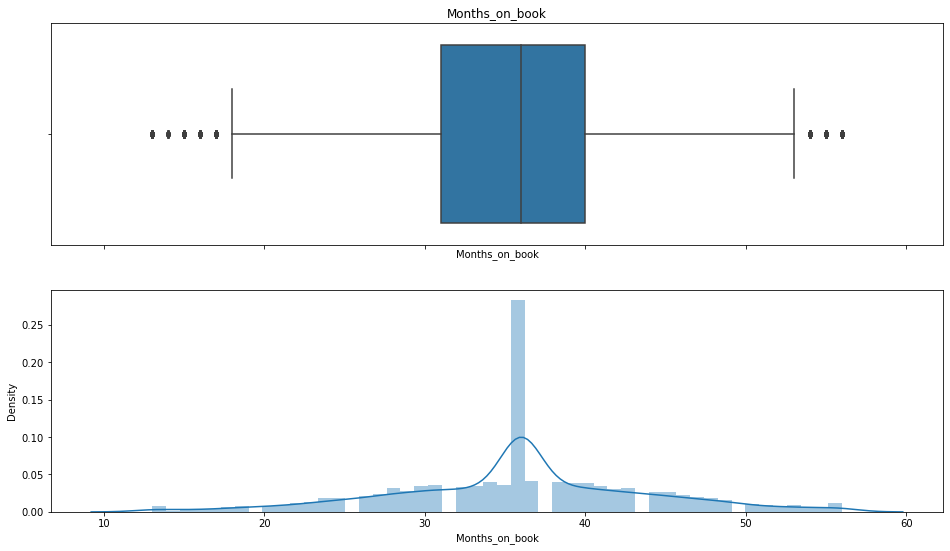

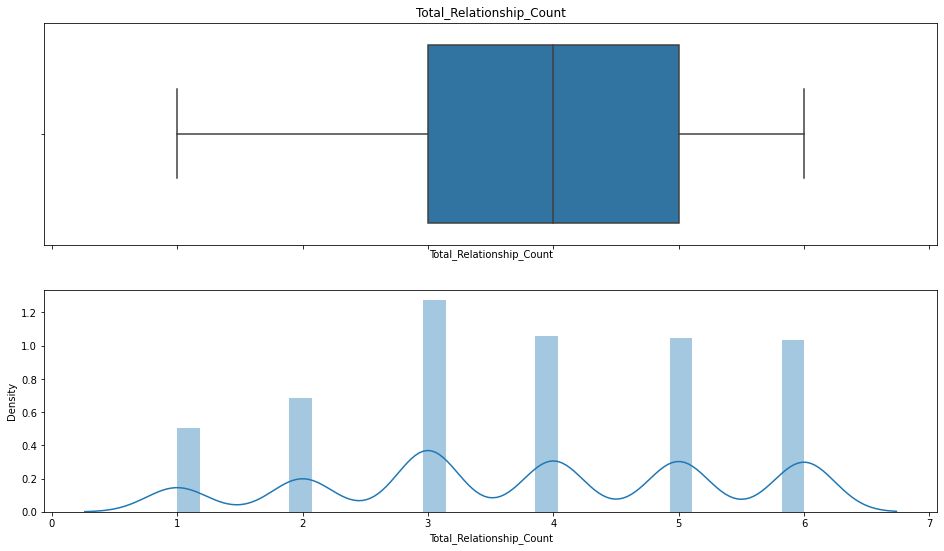

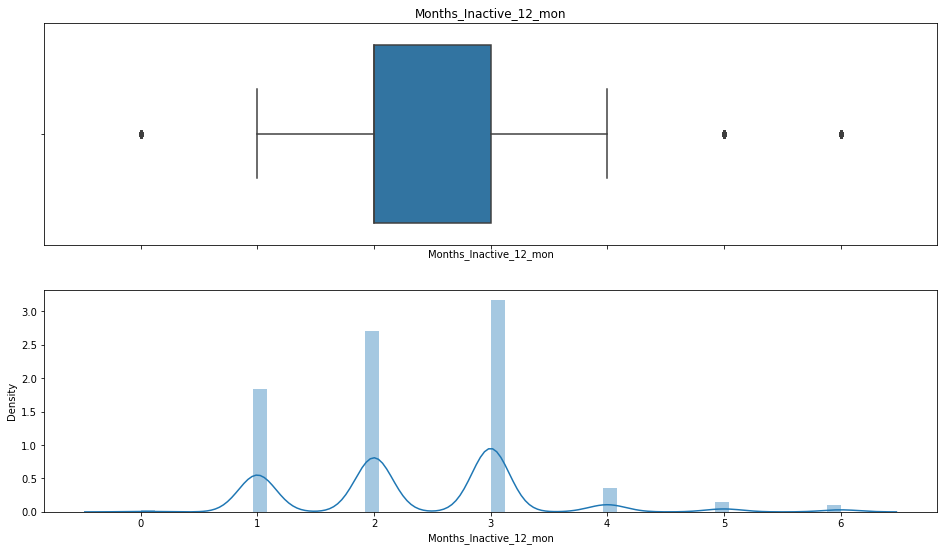

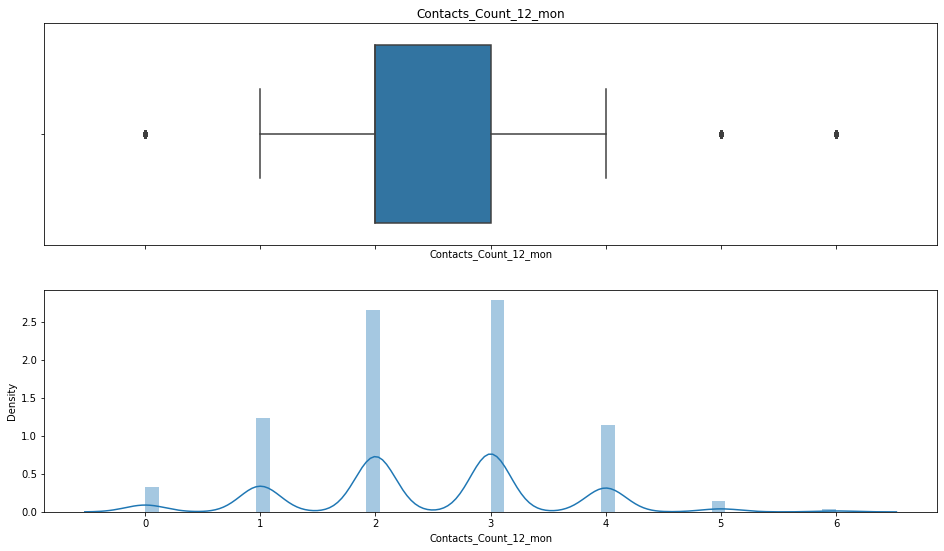

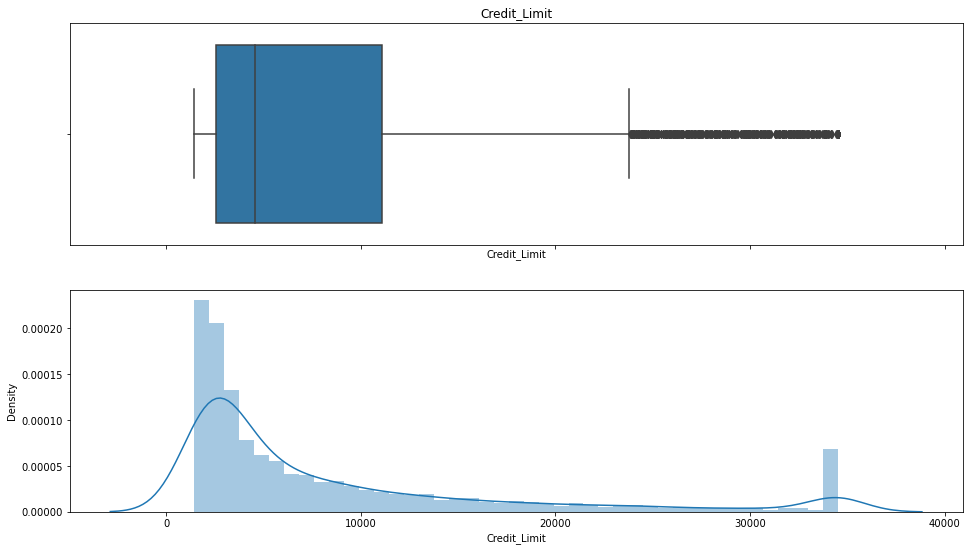

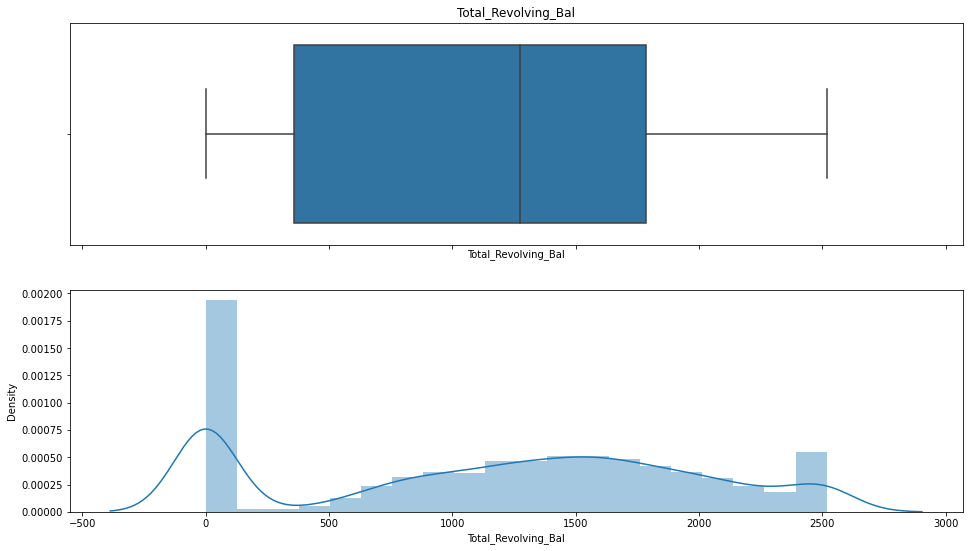

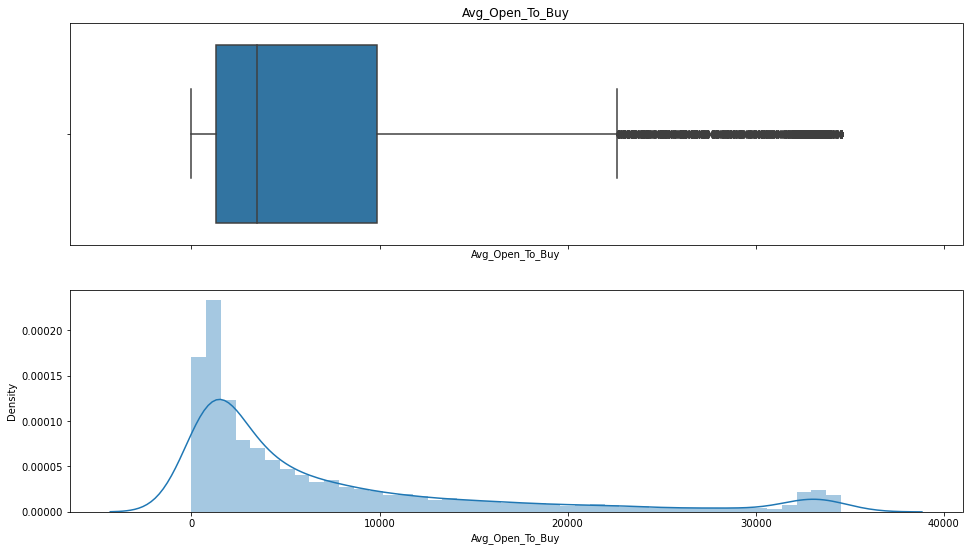

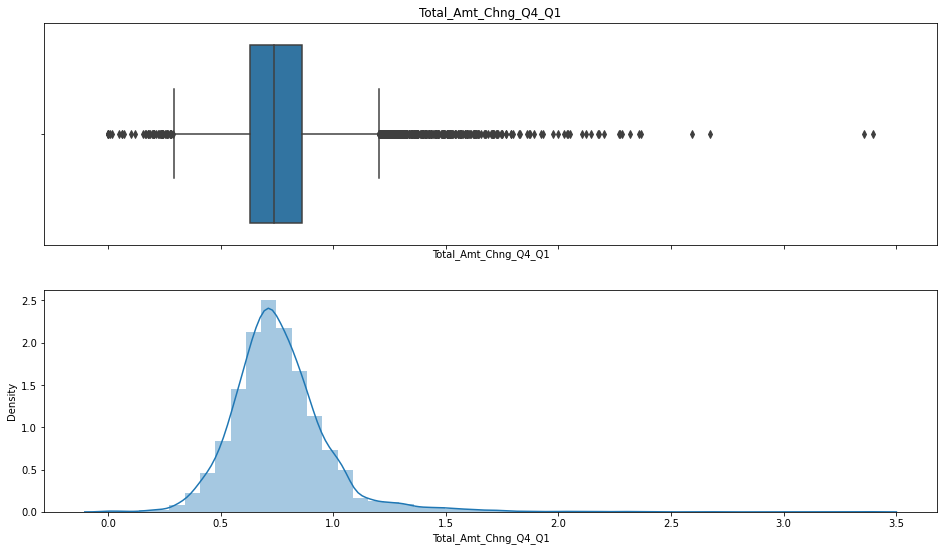

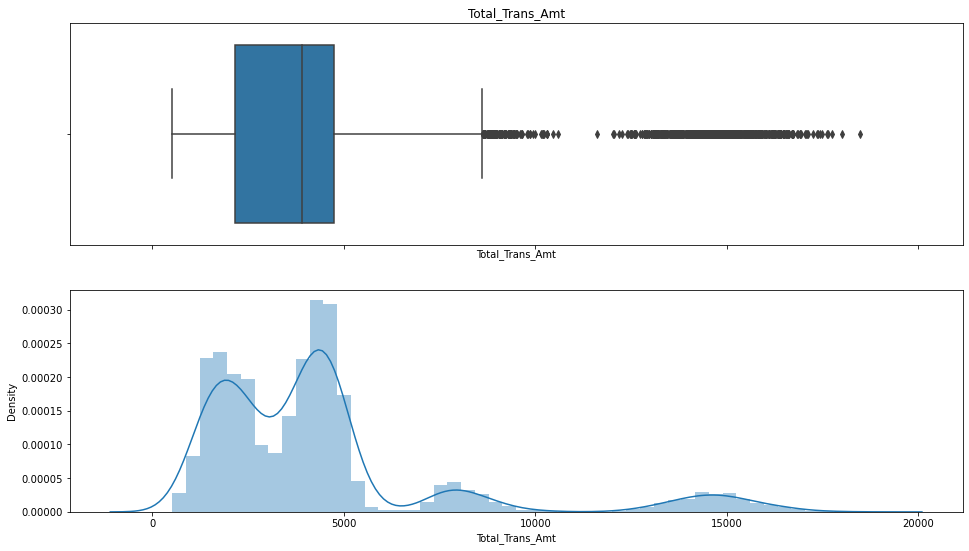

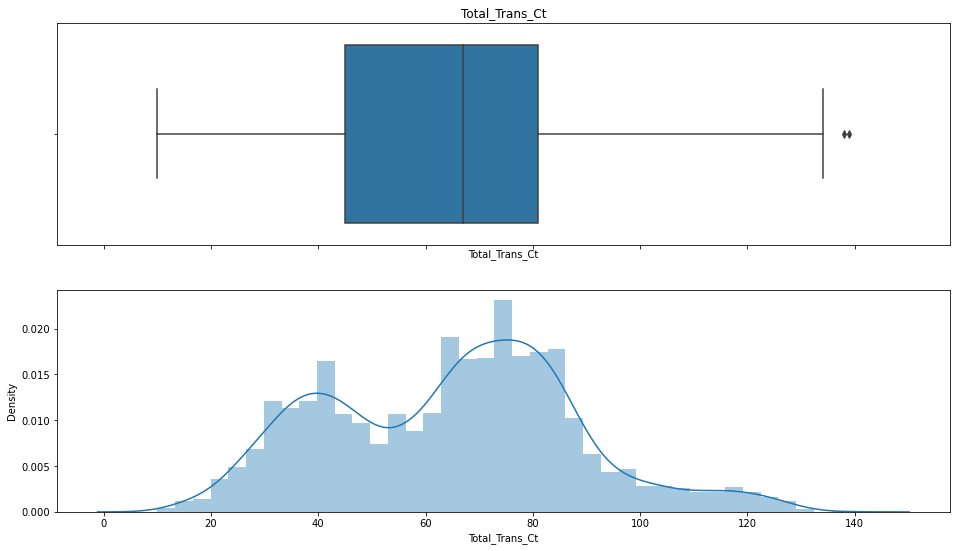

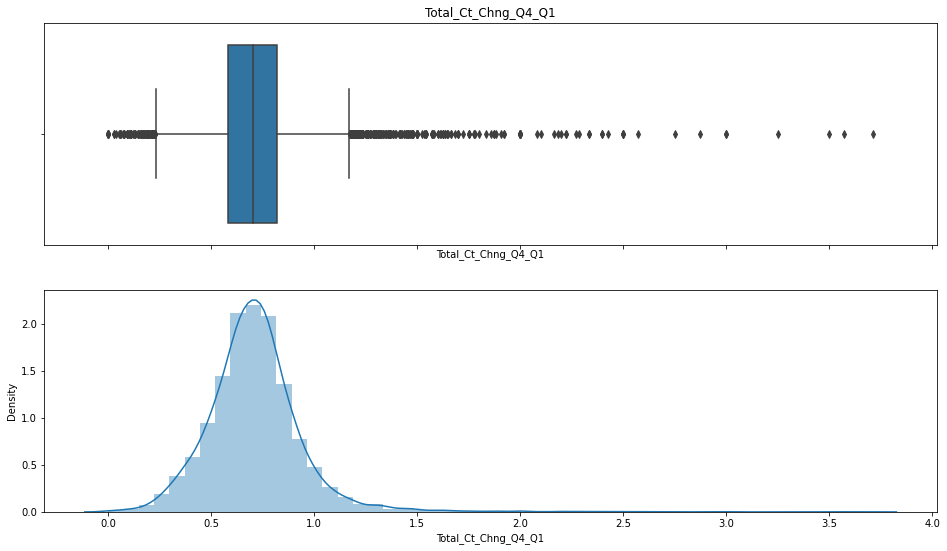

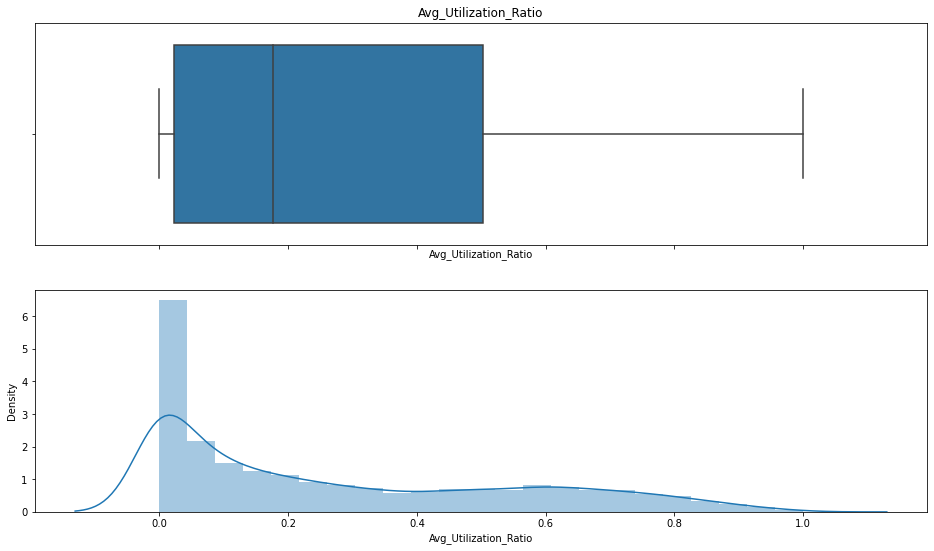

In [22]:
for column in dist_columns:
    fig, ax = plt.subplots(2,1,figsize=(16,9),sharex=True)
    ax[0].set_title(column)
    sns.boxplot(data[column],ax=ax[0])
    sns.distplot(data[column],ax=ax[1])
    
    plt.show()

- Age has a normal distribution
- Months on books has outliers in each side
- Credit limit has right skew distribution with most customers below $30k and large amount of outliers
- Avg open to buy has right skew distribution with large amount of outliers
- Total amount change looks normally distributed with outliers on both sides
- Total transaction peaks at 2300 and 4500, large amount of outlier skewed right
- Average utilization right skew with large amount of customers with 0 utilization

#### Bivariate Analysis with Correlation Matrix

In [23]:
#import label encoder
from sklearn.preprocessing import LabelEncoder  

In [24]:
#encode customer attrition
attrition_label = LabelEncoder()
data['Attrition_Flag'] = attrition_label.fit_transform(data['Attrition_Flag'])

In [25]:
attrition_label.classes_

array(['Attrited Customer', 'Existing Customer'], dtype=object)

In [26]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,1,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


In [27]:
from matplotlib import rcParams

<AxesSubplot:>

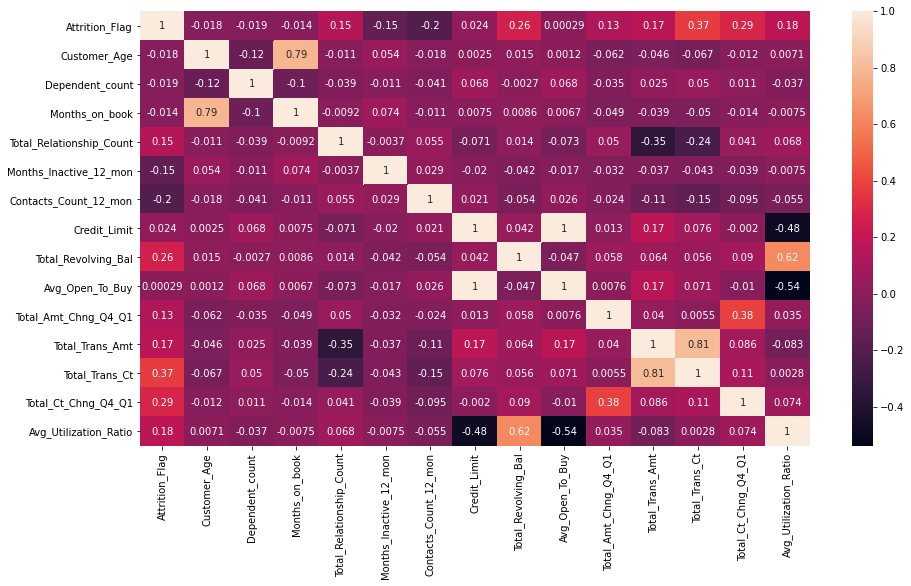

In [28]:
correlation = data.corr()
rcParams['figure.figsize'] = 15,8
sns.heatmap(correlation,annot=True)

- Existing customers show they have higher transactional counts and slightly higher revolving balances
- Positive trent with Age and months on book, the older you are the more months you were as a customer
- Positive trend with total transaction amout and total transaction count which makes sense, more transactions more you spend
- Positve correlation with total revolving bal and average utilization, you keep a higher balance with more utilization
- Negative correlation with utilization and credit limit, very interesting but makes sense if your limit is high you need to pay your balance off and use less
- Negative correlation between avg utilization and avg open to buy, which makes sense the more you use your cc the less available balance you have

In [29]:
""" Original code to make 1 graph

data_group = data.groupby(['Gender'])['Attrition_Flag'].value_counts()
data_group = data_group.to_frame()
data_group.rename(columns={'Attrition_Flag':'count'},inplace=True)
data_group.reset_index(inplace=True)
#bar plot compare attrition to categorical columns
sns.barplot(x='Gender',y='count',hue='Attrition_Flag',data=data_group)


data_group2 = data.groupby(['Education_Level'])['Attrition_Flag'].value_counts().to_frame()
data_group2.rename(columns={'Attrition_Flag':'count'},inplace=True)
data_group2.reset_index(inplace=True)
sns.barplot(x='Education_Level',y='count',hue='Attrition_Flag',data=data_group2)
"""


" Original code to make 1 graph\n\ndata_group = data.groupby(['Gender'])['Attrition_Flag'].value_counts()\ndata_group = data_group.to_frame()\ndata_group.rename(columns={'Attrition_Flag':'count'},inplace=True)\ndata_group.reset_index(inplace=True)\n#bar plot compare attrition to categorical columns\nsns.barplot(x='Gender',y='count',hue='Attrition_Flag',data=data_group)\n\n\ndata_group2 = data.groupby(['Education_Level'])['Attrition_Flag'].value_counts().to_frame()\ndata_group2.rename(columns={'Attrition_Flag':'count'},inplace=True)\ndata_group2.reset_index(inplace=True)\nsns.barplot(x='Education_Level',y='count',hue='Attrition_Flag',data=data_group2)\n"

#### **Note 1 denotes existing customers 0 denotes lost customer**

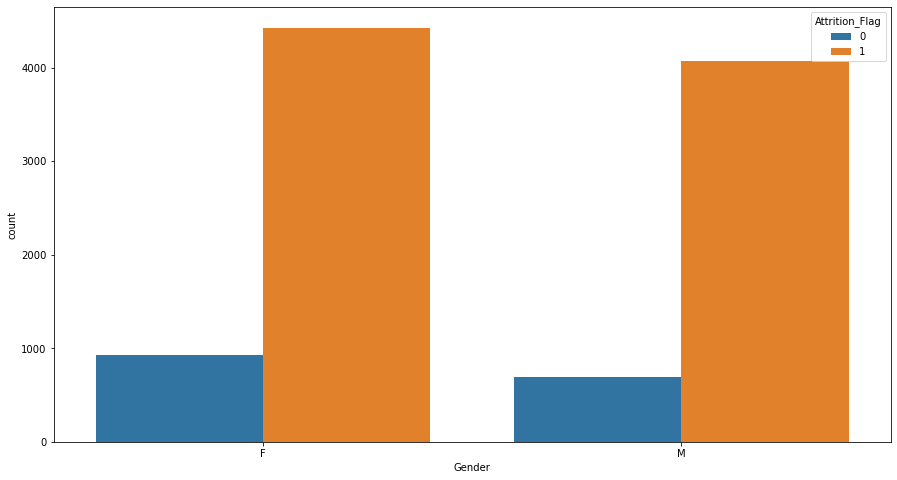

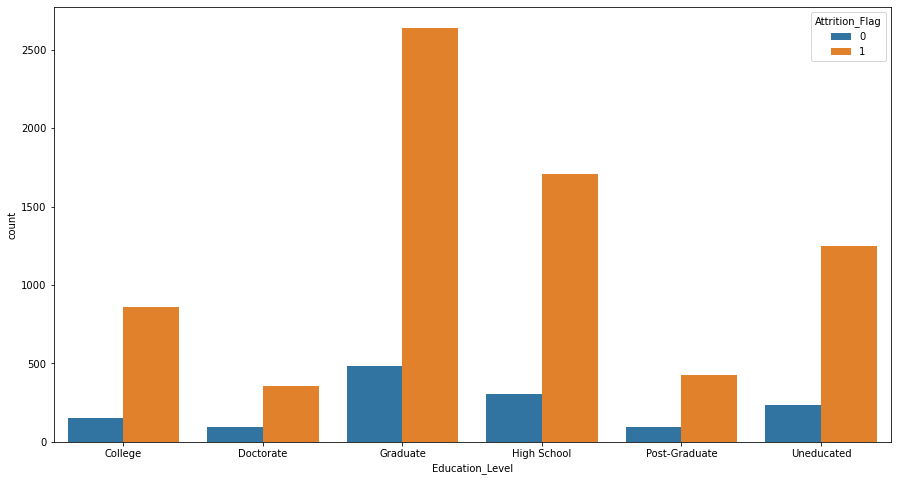

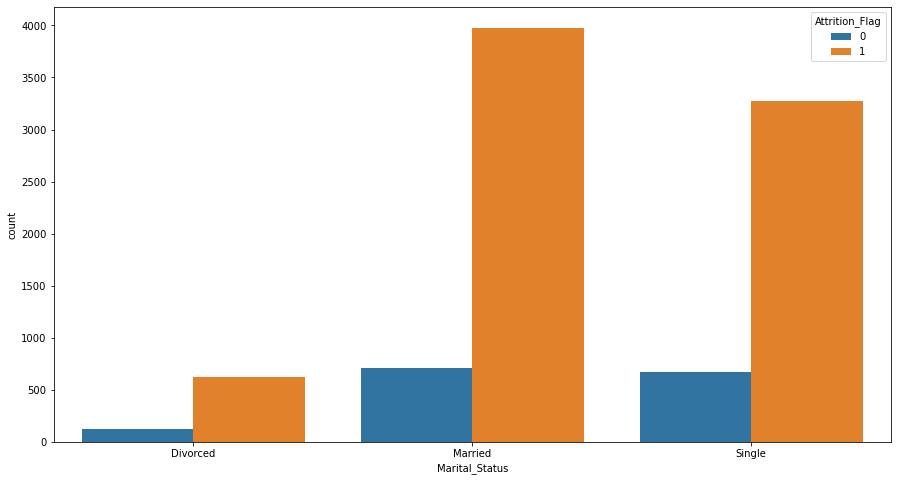

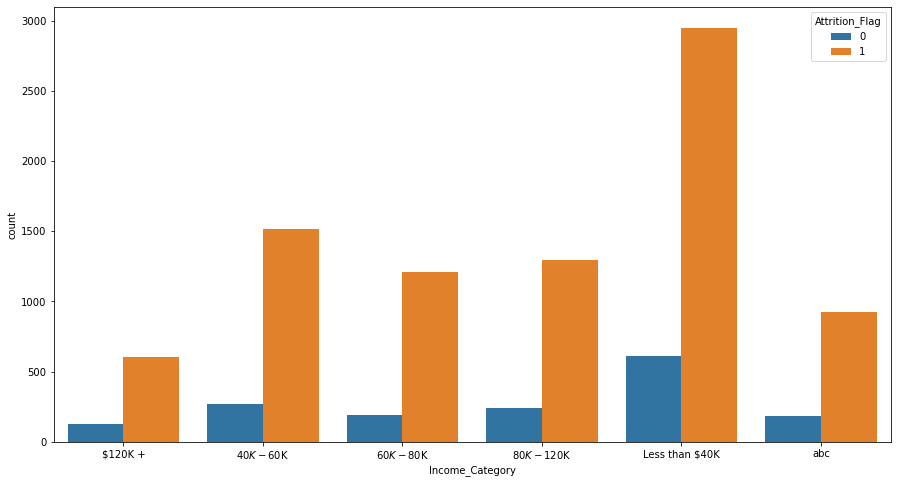

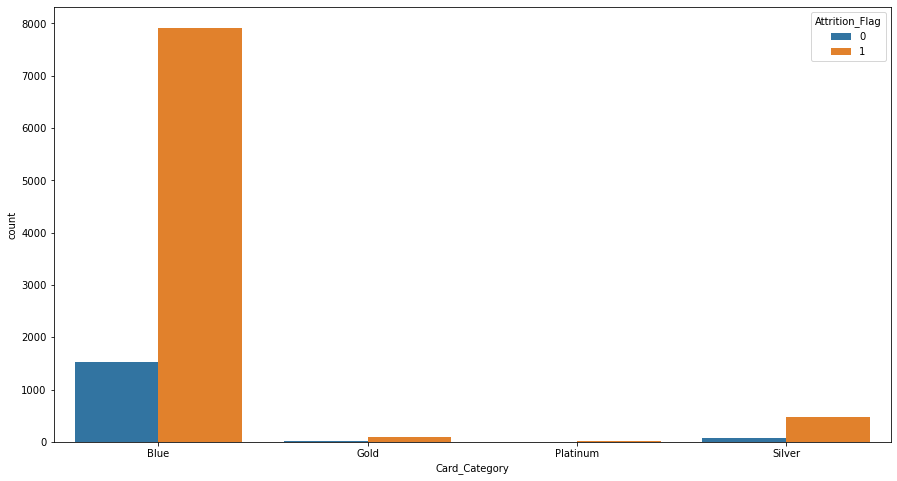

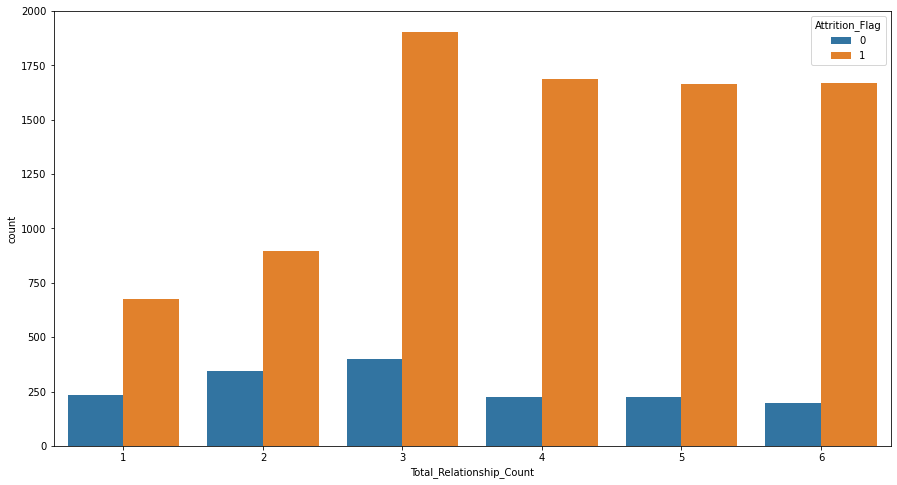

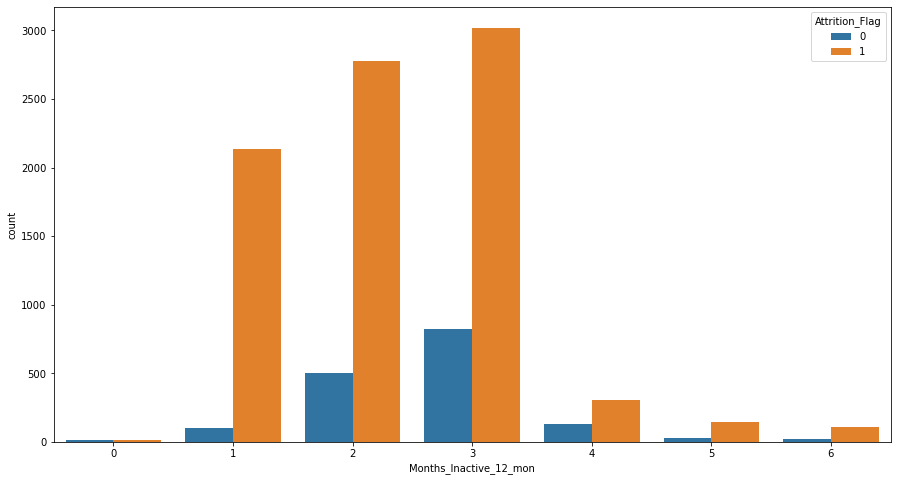

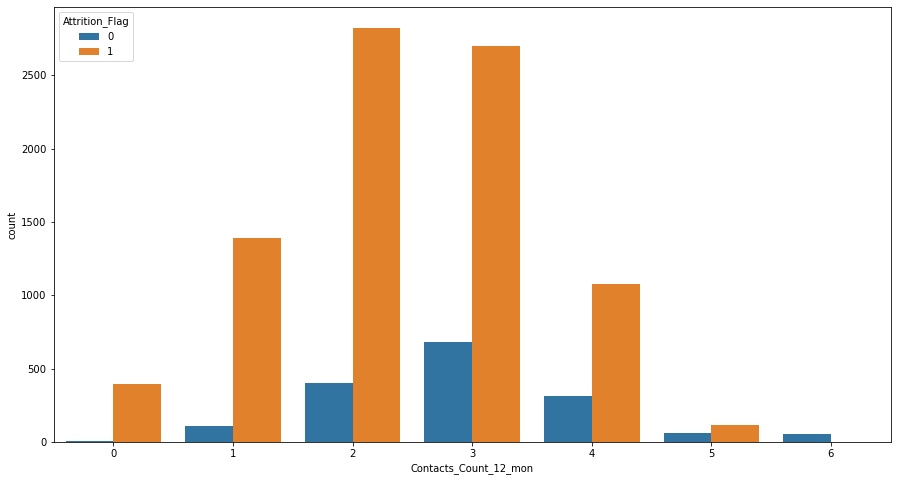

In [30]:
bar_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
for column in bar_cols:
    group = data.groupby([column])['Attrition_Flag'].value_counts().to_frame()
    group.rename(columns={'Attrition_Flag':'count'},inplace=True)
    group.reset_index(inplace=True)
    sns.barplot(x=column,y='count',hue='Attrition_Flag',data=group)
    plt.show()

- Customers who had more touches with the bank have higher pct attrition rates

### Deal with missing values

In [31]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

In [32]:
data1 = data.copy(deep=True)

In [33]:
data1['Income_Category'].replace('abc',np.nan,inplace=True)
data1.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Replace missing values with most common value in category

Splitting the data into 80% train and 20% test set

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [34]:
#split data into validation and training
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [35]:
data1.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [36]:
test_label = ['Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
y = data1['Attrition_Flag']
X = data1.drop(['Attrition_Flag'],axis=1)
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000


In [37]:
#### Split training and validation data and test data sets
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.3,random_state=1,stratify=y)

X_train2, X_test, y_train2, y_test = train_test_split(X, y, test_size=0.15, random_state=1,stratify=y)

In [38]:
modevals_train = {'Education_Level':X_train['Education_Level'].mode()[0], "Marital_Status":X_train['Marital_Status'].mode()[0],"Income_Category":X_train["Income_Category"].mode()[0]}
modevals_val = {'Education_Level':X_val['Education_Level'].mode()[0], "Marital_Status":X_val['Marital_Status'].mode()[0],"Income_Category":X_val["Income_Category"].mode()[0]}
modevals_test = {'Education_Level':X_test['Education_Level'].mode()[0], "Marital_Status":X_test['Marital_Status'].mode()[0],"Income_Category":X_test["Income_Category"].mode()[0]}

In [39]:
X_train.fillna(value=modevals_train,inplace=True)
X_val.fillna(value=modevals_val,inplace=True)
X_test.fillna(value=modevals_test,inplace=True)
X_test.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [40]:
X_train.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Replace categorical data with numerical

In [41]:
#what are categorical columns
X_train.select_dtypes(include=["object","category"]).columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [42]:
#encode train and test sets
X_train_label = LabelEncoder()

X_train[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']] = X_train[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']].apply(X_train_label.fit_transform)

X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
678,51,1,1,2,2,2,0,39,3,3,2,8796.00000,2517,6279.00000,0.49200,1195,18,0.80000,0.28600
7524,41,0,3,5,1,4,0,36,2,3,1,13733.00000,0,13733.00000,0.32500,1591,30,0.87500,0.00000
8725,53,0,2,3,2,4,0,49,1,2,3,9678.00000,1710,7968.00000,0.74500,7682,90,0.57900,0.17700
10029,42,1,3,2,1,1,1,36,3,2,5,23981.00000,1399,22582.00000,0.71200,14840,125,0.76100,0.05800
1383,27,1,0,2,2,1,0,17,5,1,2,4610.00000,0,4610.00000,0.79400,2280,49,0.40000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,45,0,3,5,2,4,0,36,3,3,3,4028.00000,710,3318.00000,0.73100,791,22,0.83300,0.17600
8365,38,0,1,3,2,1,0,36,1,2,3,2148.00000,1103,1045.00000,0.60200,4711,64,0.88200,0.51400
7169,34,0,1,2,1,4,0,23,4,1,1,2207.00000,1527,680.00000,0.86100,4159,64,1.13300,0.69200
6113,35,0,1,2,0,4,0,24,5,3,3,1438.30000,0,1438.30000,0.84900,2355,47,0.56700,0.00000


In [43]:
X_val_label = LabelEncoder()

X_val[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']] = X_val[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']].apply(X_val_label.fit_transform)

X_test_label = LabelEncoder()

X_test[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']] = X_test[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category']].apply(X_test_label.fit_transform)



### Building the model
We will be building 4 different models:

- Logistic Regression
- Support Vector Machine(SVM)
- Decision Tree
- Random Forest


Logistic Regression Model
Logistic Regression is a supervised learning algorithm that is used for binary classification problems i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                    P(y)=1/exp(1 + exp(-x))

## Logistic Regression

In [44]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

In [45]:
def metrics_print(actual,predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    print(cm)

In [46]:
clf = LogisticRegression().fit(X_train,y_train)

y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_val)
print(metrics_print(y_train,y_pred_train))
print(metrics_print(y_val,y_pred_val))


              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1139
           1       0.90      0.96      0.93      5949

    accuracy                           0.87      7088
   macro avg       0.78      0.69      0.72      7088
weighted avg       0.86      0.87      0.86      7088

[[ 470  669]
 [ 228 5721]]
None
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       488
           1       0.89      0.96      0.93      2551

    accuracy                           0.87      3039
   macro avg       0.79      0.69      0.72      3039
weighted avg       0.86      0.87      0.86      3039

[[ 199  289]
 [  94 2457]]
None


- Our model performs similarly on the training and validation data
- Our model has a hard time predicting positives on customers who attrited
- Recall on our validation set being 41% for customers attrition

In [47]:
#look at the most important coefficients

cols=X_train.columns
coef=clf.coef_

pd.DataFrame(coef,columns=cols).T.sort_values(by=0,ascending=False)

,0
Total_Relationship_Count,0.14500
Total_Trans_Ct,0.09604
Months_on_book,0.08977
Total_Ct_Chng_Q4_Q1,0.04039
Gender,0.02525
Total_Amt_Chng_Q4_Q1,0.00644
Total_Revolving_Bal,0.00066
Credit_Limit,0.00033
Avg_Open_To_Buy,-0.00033
Total_Trans_Amt,-0.00037


**Positive Features**
- Total_Relationship_Count 0.14500
- Total_Trans_Ct	0.09604
- Months_on_book	0.08977
- Total_Ct_Chng_Q4_Q1	0.04039
- Gender	0.02525
- Total_Amt_Chng_Q4_Q1	0.00644
- Total_Revolving_Bal	0.00066
- Credit_Limit	0.00033

**Negative Features**
- Avg_Open_To_Buy	-0.00033
- Total_Trans_Amt	-0.00037
- Avg_Utilization_Ratio	-0.00386
- Card_Category	-0.01065
- Marital_Status	-0.05465
- Education_Level	-0.06214
- Customer_Age	-0.10984
- Income_Category	-0.12161
- Dependent_count	-0.15397
- Months_Inactive_12_mon	-0.18551
- Contacts_Count_12_mon	-0.22478

**Observations**
- Total Relationship Count is the biggest deciding factor of keeping customers
- Customers who contacted the bank the most meaning a bunch of unresolved conflicts is the biggest feature definer whether customers leave or stay
- This model predicts inactive customer attribute to customer attrition

#### **Optimize Logistic Regression Model**

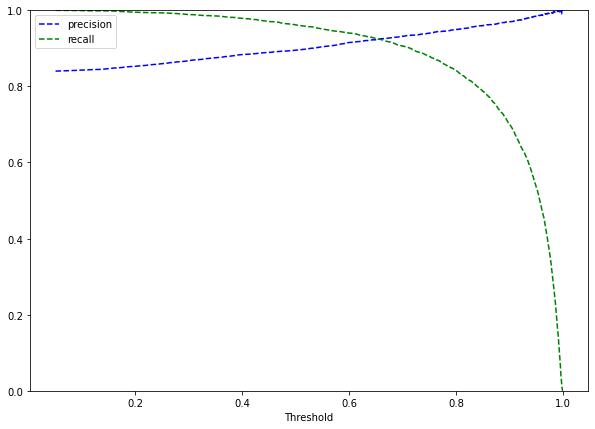

In [48]:
y_scores=clf.predict_proba(X_train)

precisions_clf, recalls_clf, thresholds_clf = precision_recall_curve(y_train, y_scores[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_clf, precisions_clf[:-1], 'b--', label='precision')
plt.plot(thresholds_clf, recalls_clf[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [49]:
for i in np.arange(len(thresholds_clf)):
    if precisions_clf[i]==recalls_clf[i]:
        print(thresholds_clf[i])

0.654890519038989


In [50]:
optimal_threshold=.65
y_pred_train = clf.predict_proba(X_train)
metrics_print(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.61      0.60      0.60      1139
           1       0.92      0.93      0.92      5949

    accuracy                           0.87      7088
   macro avg       0.77      0.76      0.76      7088
weighted avg       0.87      0.87      0.87      7088

[[ 679  460]
 [ 439 5510]]


In [51]:
y_pred_val = clf.predict_proba(X_val)
metrics_print(y_val, y_pred_val[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       488
           1       0.92      0.92      0.92      2551

    accuracy                           0.87      3039
   macro avg       0.75      0.75      0.75      3039
weighted avg       0.87      0.87      0.87      3039

[[ 286  202]
 [ 205 2346]]


Precision took a slight hit and recall slightly increased

### Support Vector Machine

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [53]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_scale_train = scaling.transform(X_train)
X_scale_val = scaling.transform(X_val)

Linear Decision boundary

In [54]:
svm_lin = SVC(kernel='linear')
svm_lin = svm_lin.fit(X_scale_train,y_train)

In [56]:
y_pred_train_svm = svm_lin.predict(X_train)
y_pred_val_svm = svm_lin.predict(X_val)
print(f"Training score Linear Decision boundary {svm_lin.score(X_train,y_train)}")
print(metrics_print(y_train,y_pred_train_svm))
print("-----------------------------------------")
print(f"Training score Linear Decision boundary {svm_lin.score(X_val,y_val)}")
print(metrics_print(y_val,y_pred_val_svm))



Training score Linear Decision boundary 0.1781884875846501
              precision    recall  f1-score   support

           0       0.16      0.96      0.27      1139
           1       0.79      0.03      0.06      5949

    accuracy                           0.18      7088
   macro avg       0.47      0.49      0.16      7088
weighted avg       0.69      0.18      0.09      7088

[[1093   46]
 [5779  170]]
None
-----------------------------------------
Training score Linear Decision boundary 0.17867719644619942
              precision    recall  f1-score   support

           0       0.16      0.94      0.27       488
           1       0.75      0.03      0.06      2551

    accuracy                           0.18      3039
   macro avg       0.45      0.49      0.17      3039
weighted avg       0.66      0.18      0.10      3039

[[ 461   27]
 [2469   82]]
None


This model performs poorly predicting any customer attrition, let's adjust

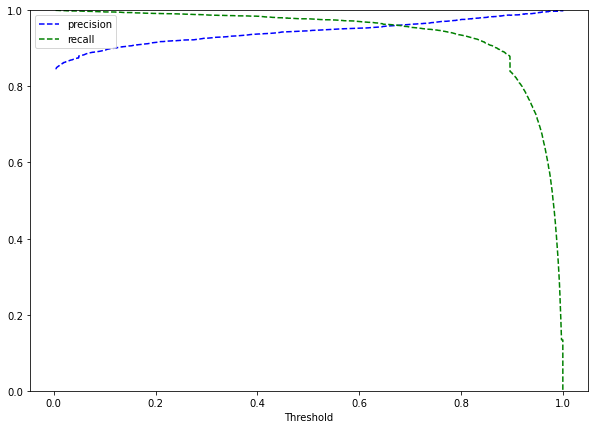

In [59]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_scale_train,y_train)
y_scores_svm=svm_rbf.predict_proba(X_scale_train) # Predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [63]:
for i in np.arange(len(thresholds_svm)):
    if (recalls_svm[i] == precisions_svm[i]):
        optimal_threshold_svm = thresholds_svm[i]
        print(thresholds_svm[i])

0.6766654939311826


In [64]:
optimal_threshold_svm

0.6766654939311826

In [71]:
y_pred_train = svm_rbf.predict_proba(X_scale_train)
print(f"Training score rbf model with optimal threshhold {svm_rbf.score(X_scale_train,y_train)}")
metrics_print(y_train, y_pred_train[:,1]>optimal_threshold_svm)


Training score rbf model with optimal threshhold 0.9318566591422122
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1139
           1       0.96      0.96      0.96      5949

    accuracy                           0.93      7088
   macro avg       0.88      0.88      0.88      7088
weighted avg       0.93      0.93      0.93      7088

[[ 903  236]
 [ 237 5712]]


Drastically improved our model accuracy missing only 21% of positive predictions and declaring 21% wrong for attrited customers

In [72]:
#validation set
y_pred_val = svm_rbf.predict_proba(X_scale_val)
print(f"Training score rbf model with optimal threshhold {svm_rbf.score(X_scale_val,y_val)}")
metrics_print(y_val, y_pred_val[:,1]>optimal_threshold_svm)

Training score rbf model with optimal threshhold 0.9124712076340902
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       488
           1       0.95      0.95      0.95      2551

    accuracy                           0.91      3039
   macro avg       0.84      0.83      0.83      3039
weighted avg       0.91      0.91      0.91      3039

[[ 349  139]
 [ 130 2421]]


Model perfoms almost as good on our validation data set but most importantly our model performed better with non linear kernel

## Decision Tree

In [82]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [83]:
clf1 = DecisionTreeClassifier(criterion='gini',random_state=10,max_depth=5)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [87]:
labels = y_train.unique()
feature_names = list(X_train.columns)

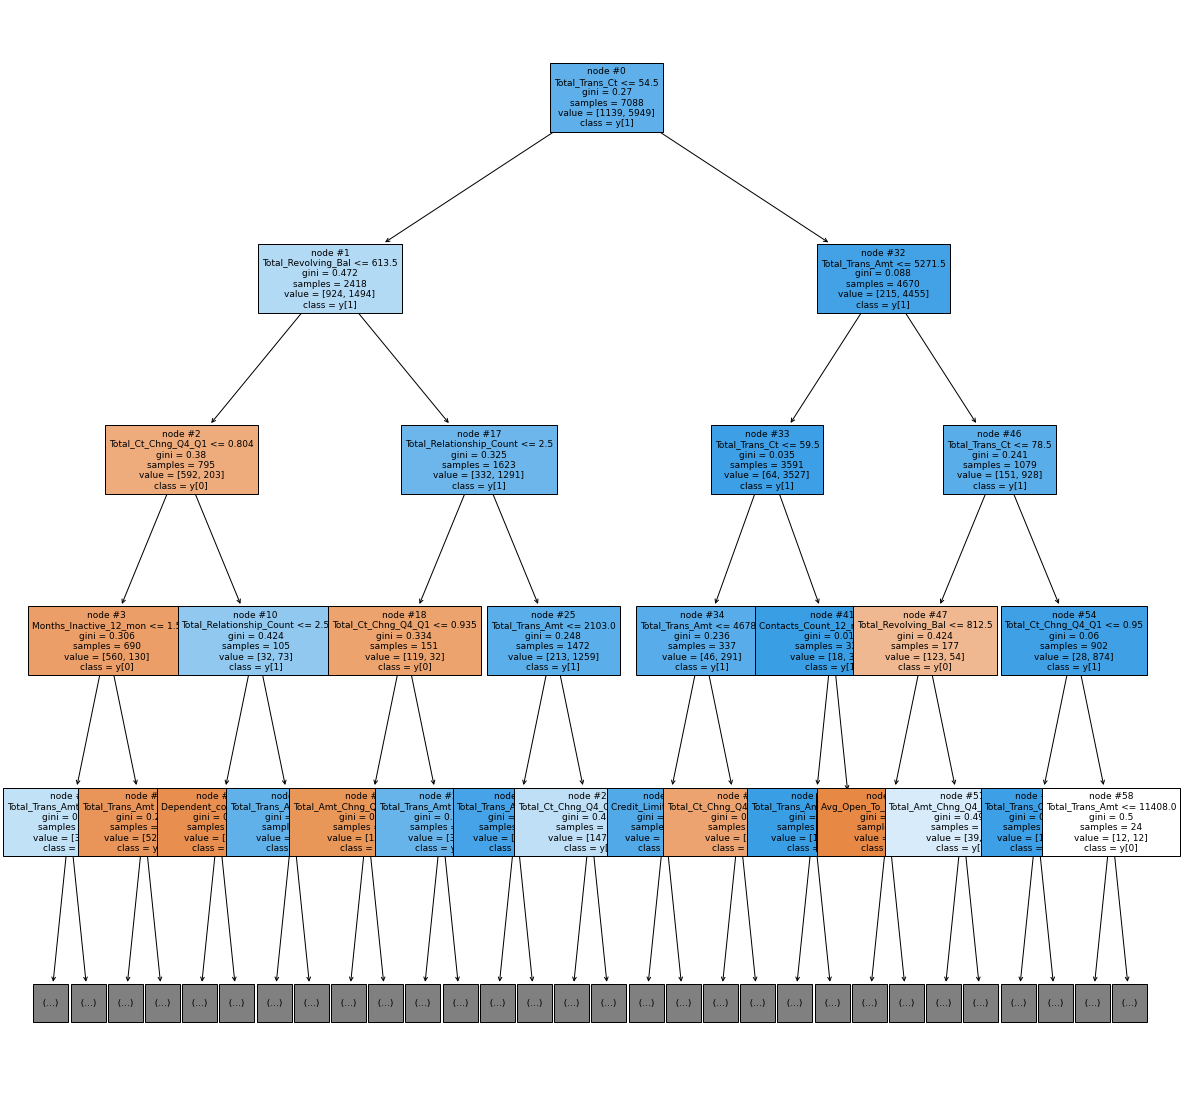

In [89]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(clf1,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

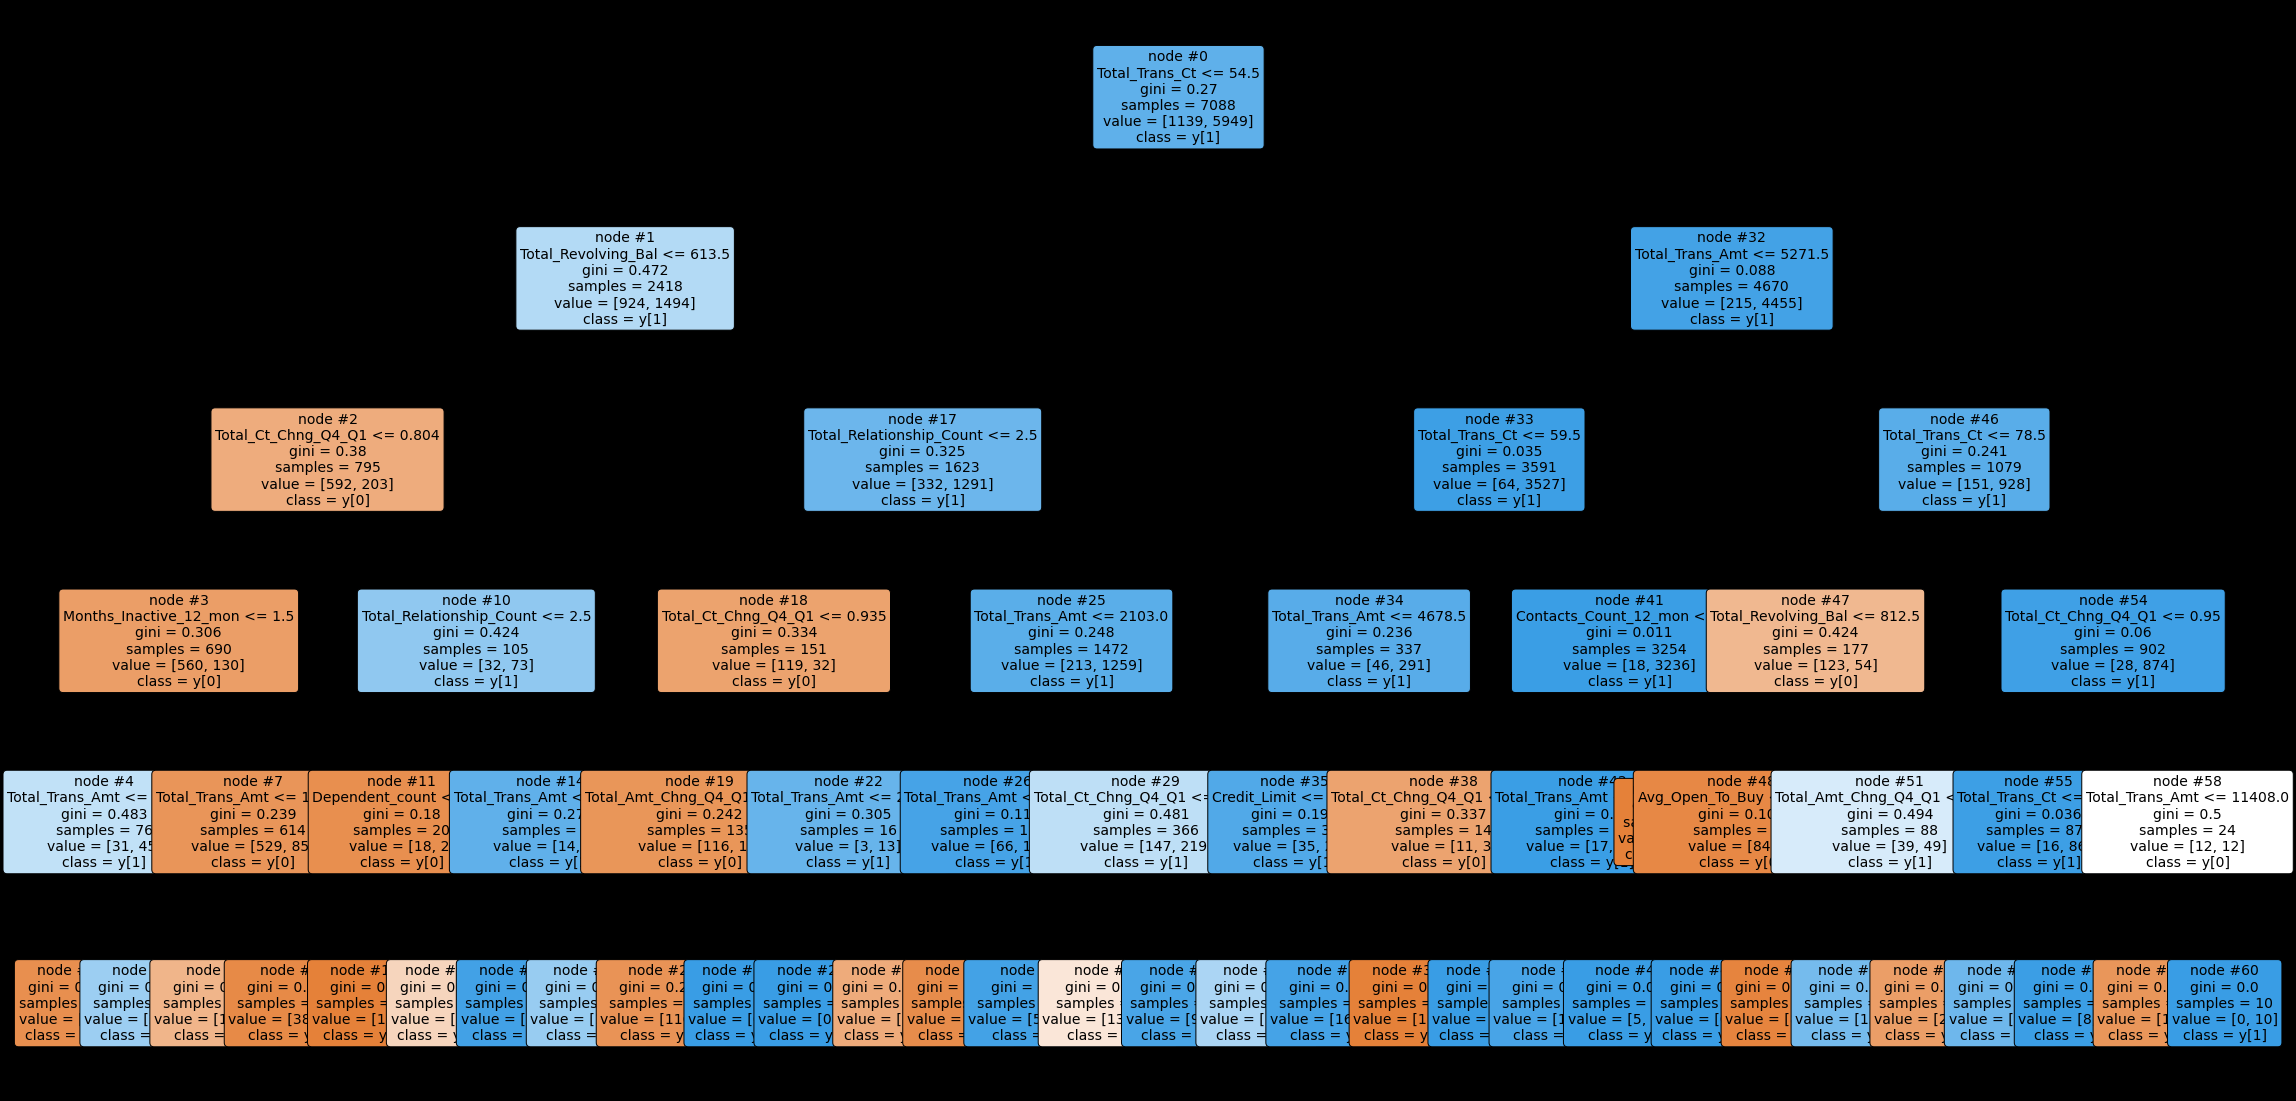

In [93]:
#plt the figure, setting a black background
plt.figure(figsize=(40,20), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf1,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names=True,
                   rounded = True,
                   filled = True,
                   node_ids= True,
                   fontsize=14)
#show the plot
plt.show()

In [94]:
#check performance
y_pred_train = clf1.predict(X_train)
print(metrics_print(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1139
           1       0.97      0.96      0.97      5949

    accuracy                           0.94      7088
   macro avg       0.89      0.90      0.89      7088
weighted avg       0.94      0.94      0.94      7088

[[ 958  181]
 [ 228 5721]]
None


In [95]:
y_pred_val = clf1.predict(X_val)
print(metrics_print(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       488
           1       0.96      0.95      0.95      2551

    accuracy                           0.92      3039
   macro avg       0.86      0.87      0.86      3039
weighted avg       0.93      0.92      0.92      3039

[[ 384  104]
 [ 126 2425]]
None


We see an increased performance in this model correctly predicting 75% of customer attrition and incorrectly calling 21% same as last model

Decision Tree w/ Entropy model

In [97]:
clf2 = DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=5)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

In [98]:
y_pred_train = clf2.predict(X_train)
print(metrics_print(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1139
           1       0.96      0.97      0.97      5949

    accuracy                           0.94      7088
   macro avg       0.90      0.88      0.89      7088
weighted avg       0.94      0.94      0.94      7088

[[ 898  241]
 [ 170 5779]]
None


In [99]:
y_pred_val = clf2.predict(X_val)
print(metrics_print(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       488
           1       0.95      0.97      0.96      2551

    accuracy                           0.93      3039
   macro avg       0.88      0.85      0.86      3039
weighted avg       0.93      0.93      0.93      3039

[[ 356  132]
 [  88 2463]]
None


slightly increased precision compared to gini but lower recall

In [107]:
#increase depth of tree
clf3 = DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=8)
clf3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=10)

In [108]:
y_pred_train = clf3.predict(X_train)
print(metrics_print(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1139
           1       0.98      0.99      0.98      5949

    accuracy                           0.97      7088
   macro avg       0.96      0.93      0.94      7088
weighted avg       0.97      0.97      0.97      7088

[[ 994  145]
 [  68 5881]]
None


In [109]:
y_pred_val = clf3.predict(X_val)
print(metrics_print(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       488
           1       0.95      0.97      0.96      2551

    accuracy                           0.94      3039
   macro avg       0.90      0.86      0.88      3039
weighted avg       0.94      0.94      0.94      3039

[[ 367  121]
 [  65 2486]]
None


- Increasing the depth increased the precision, accuracy, and recall greatly on training and slightly on validation sets


#### Let's look at the important feature for model

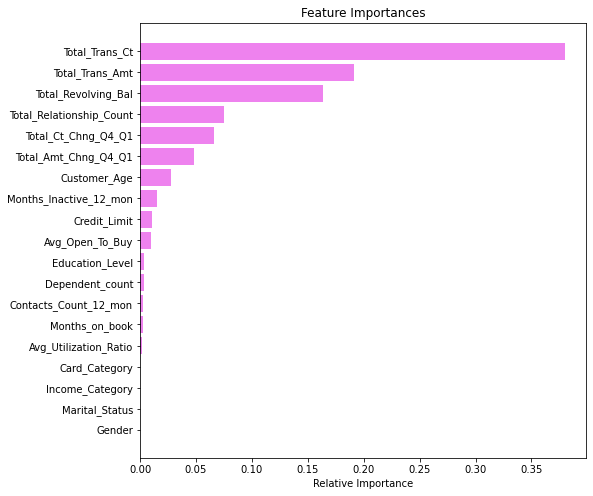

In [110]:
# Importance of features in the tree building


importances = clf3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [111]:
importances

array([0.02757936, 0.        , 0.00356968, 0.00373033, 0.        ,
       0.        , 0.        , 0.0024649 , 0.07492682, 0.01506395,
       0.00275286, 0.01047174, 0.16329859, 0.00957556, 0.04820046,
       0.1909301 , 0.38018472, 0.06594781, 0.00130313])

## Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
clf_random = RandomForestClassifier(random_state=2)
clf_random.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

In [116]:
#check performance
y_pred_train_rf = clf_random.predict(X_train)
print(metrics_print(y_train,y_pred_train_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1139
           1       1.00      1.00      1.00      5949

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

[[1139    0]
 [   0 5949]]
None


In [117]:
y_pred_val_rf = clf_random.predict(X_val)
print(metrics_print(y_val,y_pred_val_rf))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       488
           1       0.96      0.99      0.98      2551

    accuracy                           0.96      3039
   macro avg       0.95      0.89      0.92      3039
weighted avg       0.96      0.96      0.96      3039

[[ 389   99]
 [  26 2525]]
None


RF is overfitting training data, but has performed best on the validation data set w/ recall at 80%, precision 94% and accuracy 96%

In [118]:
#let us try it on our test data for verification
y_pred_test_rf = clf_random.predict(X_test)
print(metrics_print(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       244
           1       0.96      0.99      0.98      1276

    accuracy                           0.96      1520
   macro avg       0.95      0.89      0.92      1520
weighted avg       0.96      0.96      0.96      1520

[[ 195   49]
 [  13 1263]]
None


Same results, best model


<AxesSubplot:xlabel='Importance'>

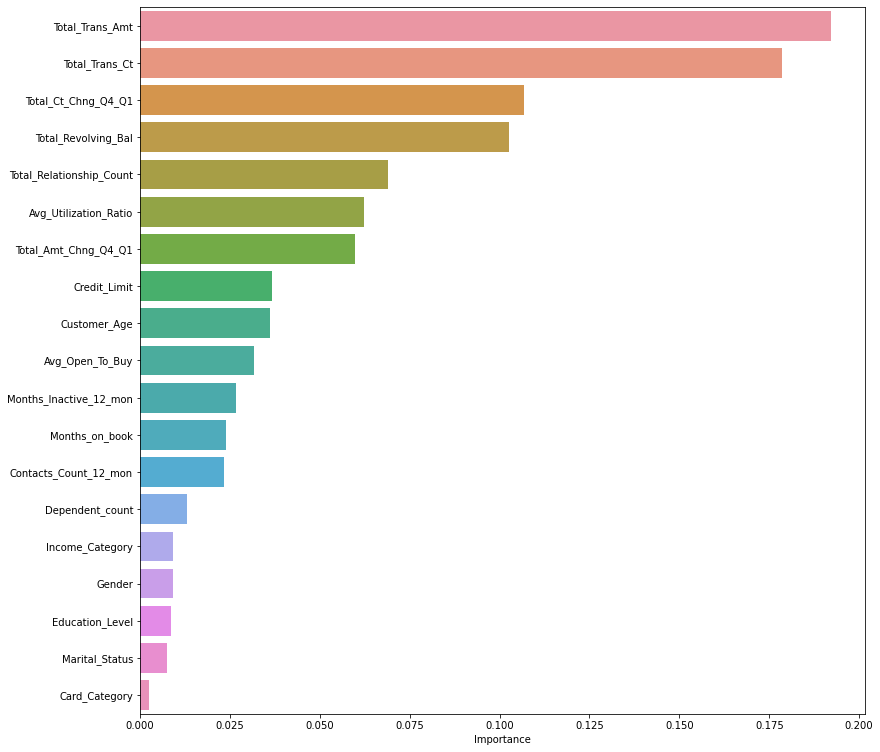

In [120]:
importances = clf_random.feature_importances_

importance_df = pd.DataFrame(importances, index = feature_names, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)